# Stellar Classification

In this project, the performance of different machine learning algorithms will be compared using the stellar classification dataset. You can reach the dataset with this link:
https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17/data

In [ ]:
""" import necessary libraries"""
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
""" upload dataset from your PC, you can use different methods"""
from google.colab import files
data = files.upload()

Saving star_classification.csv to star_classification.csv


## Pre-processing

In [ ]:
import pandas as pd
datafr = pd.read_csv(list(data)[0], encoding='cp1252')

datafr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

### Remove Null Values
It is found that there are no null values in all columns using the .info() method. However, for experimental purposes, the .dropna() function will be used from the pandas library to delete rows that have any null values. Instead of deleting rows, we could also apply mean, median, mode, or constant value imputation.

In [ ]:
datafr = datafr.dropna()

datafr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

### Drop Columns

The columns like "run_ID", "rerun_ID", "cam_col", "field_ID", "spec_obj_ID", "plate", and "fiber_ID" are removed, because they are primarily identification numbers and do not provide relevant information about the physical characteristics or properties of the objects in the dataset. These columns are essentially IDs and don't contribute to the task of classifying objects into categories like galaxies, stars, or quasars.

Regarding "MJD" (Modified Julian Date), it was also removed because while it does represent the time of observation, the classification task is based on the inherent properties of the objects themselves, and the timing of observations is not a distinguishing feature for identifying whether an object is a galaxy, star, or quasar. Therefore, "MJD" was considered non-essential for the classification task.

In [ ]:
# List of column names to drop
columns_to_drop = ["run_ID", "rerun_ID", "cam_col", "field_ID", "spec_obj_ID", "plate", "MJD", "fiber_ID"]

# Drop the columns that won't be used in classification
df = datafr.drop(columns = columns_to_drop, axis = 1)

df.head()

,obj_ID,alpha,delta,u,g,r,i,z,class,redshift
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,GALAXY,0.634794
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,GALAXY,0.779136
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,GALAXY,0.644195
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,GALAXY,0.932346
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,GALAXY,0.116123


### Normalize Values

It has been decided that to normalize the columns "obj_ID", "alpha", "delta", "u", "g", "r", "i", "z", and "redshift" using standard scaling (z-score normalization). These columns were selected because they represent numerical features with varying scales and units. Normalization ensures that all features have a mean of zero and a standard deviation of one, making them directly comparable and helping the classification algorithm to converge more effectively and avoid biases due to scale differences.

In [ ]:
from sklearn.preprocessing import StandardScaler

# List of column names to normalize
columns_to_normalize = ["obj_ID", "alpha", "delta", "u", "g", "r", "i", "z", "redshift"]

# Create an instance of Min Max Scaler
standard_scaler = StandardScaler()

# Fit the scaler on the selected columns and transform the data
df[columns_to_normalize] = standard_scaler.fit_transform(df[columns_to_normalize])

df.head()

,obj_ID,alpha,delta,u,g,r,i,z,class,redshift
0,-0.445634,-0.434604,0.425529,0.059755,0.054926,0.403962,0.046007,0.003937,GALAXY,0.079557
1,0.018740,-0.339921,0.363402,0.088045,0.072456,1.584406,1.185097,0.092835,GALAXY,0.277096
2,-0.445633,-0.367251,0.582713,0.103327,0.067165,0.519745,0.150019,0.008808,GALAXY,0.092423
3,-0.147311,1.669523,-1.249105,0.004921,0.102210,1.059904,0.807610,0.018321,GALAXY,0.486770
4,1.842768,1.737310,-0.150242,-0.080055,-0.092948,-1.697421,-1.767887,-0.098468,GALAXY,-0.630267


## Split the dataset

5-fold cross validation is used.

In [ ]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix

# Create KFold object with k = 5 and random state = 42
kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)

# X is the feature data and y is the target variable
X, y = df.drop(columns = ["class"], axis = 1).to_numpy(), df["class"].to_numpy()

## Classification Methods

The comparison will be based on the results of kNN, weigted-kNN, Naive Bayes, Random Forest and SVM (Support Vector Machines).

### kNN

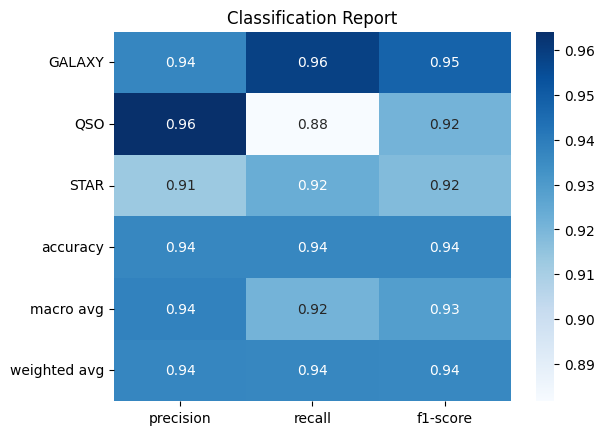

Accuracy: 93.64%


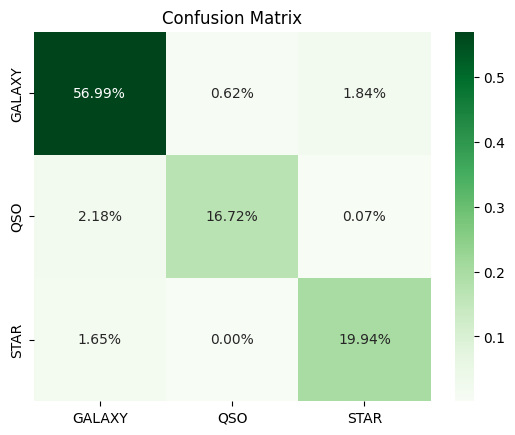

In [ ]:
# import KNeighbors Classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

labels = ["GALAXY", "QSO", "STAR"]

knn_model = KNeighborsClassifier(n_neighbors = 5)

# Get predicted labels for each fold using cross_val_predict
knn_predict = cross_val_predict(knn_model, X, y, cv=kfold)

# Compute and print the classification report and confusion matrix for all folds
knn_report = classification_report(y, knn_predict, output_dict = True)
sns.heatmap(pd.DataFrame(knn_report).iloc[:-1, :].T, cmap = "Blues", annot=True)
plt.title("Classification Report")
plt.show()

print(f'Accuracy: {knn_report["accuracy"] * 100:.2f}%')

knn_matrix = confusion_matrix(y, knn_predict)
sns.heatmap(knn_matrix/np.sum(knn_matrix), cmap = "Greens", fmt = ".2%",
            xticklabels = labels, yticklabels = labels, annot = True)
plt.title("Confusion Matrix")
plt.show()


The model performs well with high precision and recall for GALAXY and STAR, but slightly lower for QSO. Overall accuracy is 94%. The model excels at identifying GALAXY and STAR objects but misses some QSO objects. Notably, varying the k value (number of neighbors) doesn't significantly impact performance, suggesting k=5 is a reasonable choice.

### Weigted-kNN

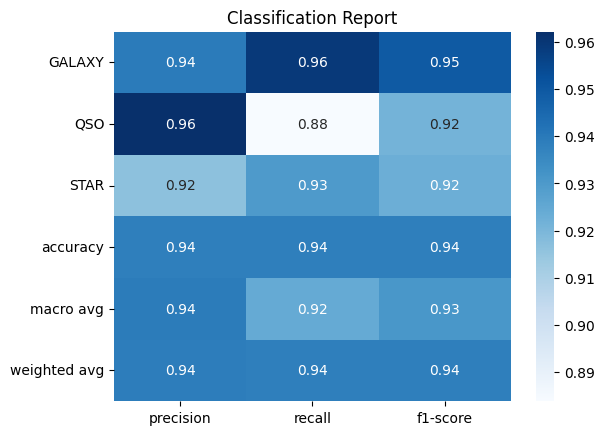

Accuracy: 93.85%


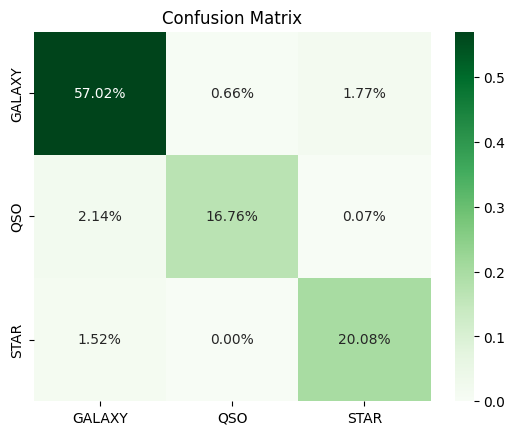

In [ ]:
# "weights" parameter given as 'distance' for weighted-kNN
weighted_knn_model = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')

# Get predicted labels for each fold using cross_val_predict
weighted_knn_predict = cross_val_predict(weighted_knn_model, X, y, cv=kfold)

# Compute and print the classification report and confusion matrix for all folds
weighted_knn_report = classification_report(y, weighted_knn_predict,
                                            output_dict = True)
sns.heatmap(pd.DataFrame(weighted_knn_report).iloc[:-1, :].T,
            cmap = "Blues", annot=True)
plt.title("Classification Report")
plt.show()

print(f'Accuracy: {weighted_knn_report["accuracy"] * 100:.2f}%')

weighted_knn_matrix = confusion_matrix(y, weighted_knn_predict)
sns.heatmap(weighted_knn_matrix/np.sum(weighted_knn_matrix),
            cmap = "Greens", fmt = ".2%", xticklabels = labels,
            yticklabels = labels, annot = True)
plt.title("Confusion Matrix")
plt.show()

The weighted K-nearest neighbors classification results closely resemble those of the standard KNN. The accuracy on weighted-kNN is slightly higher, and there are some slight variations in precision and recall. The weighted KNN assigns different weights to neighbors based on distances, but it doesn't significantly change the overall classification performance in this situation, which remains consistent with the standard KNN results.

### Naive Bayes

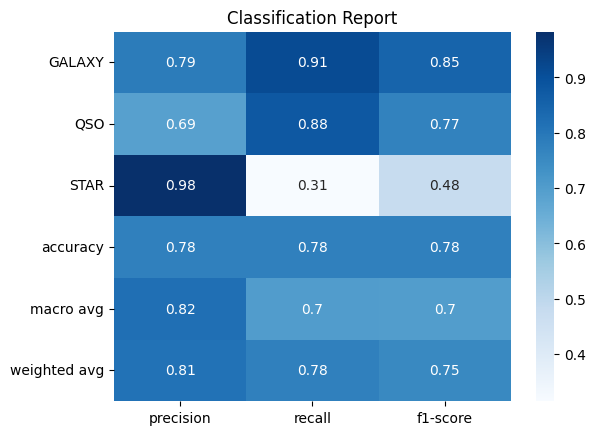

Accuracy: 77.85%


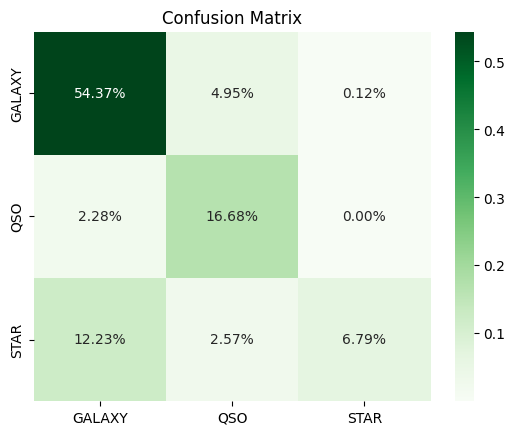

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

#generate cross-validated predictions for all k-folds.
y_pred = cross_val_predict(nb_model, X=X, y=y, cv=kfold)

#output
nbayes_report = classification_report(y, y_pred,
                                            output_dict = True)
sns.heatmap(pd.DataFrame(nbayes_report).iloc[:-1, :].T,
            cmap = "Blues", annot=True)
plt.title("Classification Report")
plt.show()

print(f'Accuracy: {nbayes_report["accuracy"] * 100:.2f}%')

nbayes_matrix = confusion_matrix(y, y_pred)
sns.heatmap(nbayes_matrix/np.sum(nbayes_matrix),
            cmap = "Greens", fmt = ".2%", xticklabels = labels,
            yticklabels = labels, annot = True)
plt.title("Confusion Matrix")
plt.show()

Using the Naive Bayes algorithm, as implemented in the sci-kit library, the model were able to classify the entries in the database with 77.85% accuracy.

It must first be observed that in our database, labels are not represented equally, and there are far more GALAXY type constellations as opposed to STARs and QSOs. While perhaps acceptable for other models, this becomes a real problem with Naive Bayes; for the model makes its predictions in a probabilistic way, and understands that occurance of a GALAXY type is more probable. This can be clearly be seen in the confusion matrix; there are twice as many STAR type data points identified as GALAXY than STAR types identified as STARs. Precision scores from the classification table is also revealing; 98% of all STAR predictions are correct, even though these comprise merely 31% of all STAR type entries in the dataset. The other two labels have low precision, because of the false positives from other labels.

### Random Forest

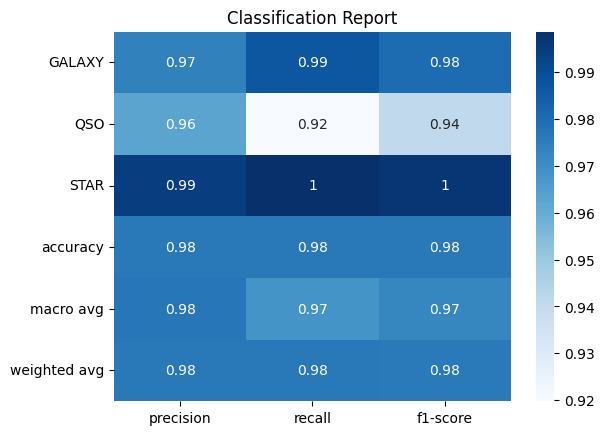

Accuracy: 97.66%


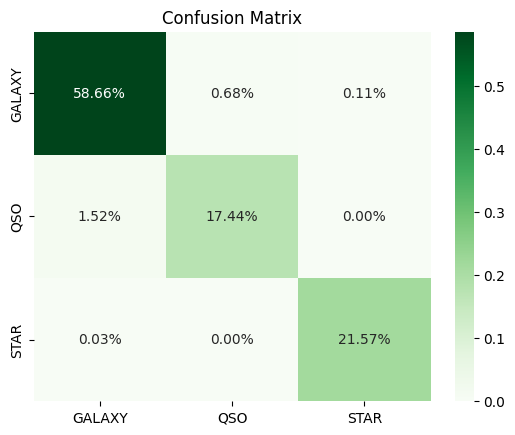

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#our classification model, with 10 decision trees.
rm_model = RandomForestClassifier(n_estimators=10)

#generate cross-validated predictions for all k-folds.
y_pred = cross_val_predict(rm_model, X=X, y=y, cv=kfold)

#output
rforest_report = classification_report(y, y_pred,
                                            output_dict = True)
sns.heatmap(pd.DataFrame(rforest_report).iloc[:-1, :].T,
            cmap = "Blues", annot=True)
plt.title("Classification Report")
plt.show()

print(f'Accuracy: {rforest_report["accuracy"] * 100:.2f}%')

rforest_matrix = confusion_matrix(y, y_pred)
sns.heatmap(rforest_matrix/np.sum(rforest_matrix),
            cmap = "Greens", fmt = ".2%", xticklabels = labels,
            yticklabels = labels, annot = True)
plt.title("Confusion Matrix")
plt.show()

Using the The Random Forest algorithm, as implemented in the sci-kit library, the model were able to classify the entries in the database with 97.71% accuracy. A most pleasing result, demonstrating the efficiency of this rigorous model. Confusion Matrix reveals minimal inaccuracies. Excellent precision, recall, and f1 score values. Notably, varying the n_neighbours value (number of decision trees) doesn't significantly impact performance.

### SVM (Support Vector Machines)

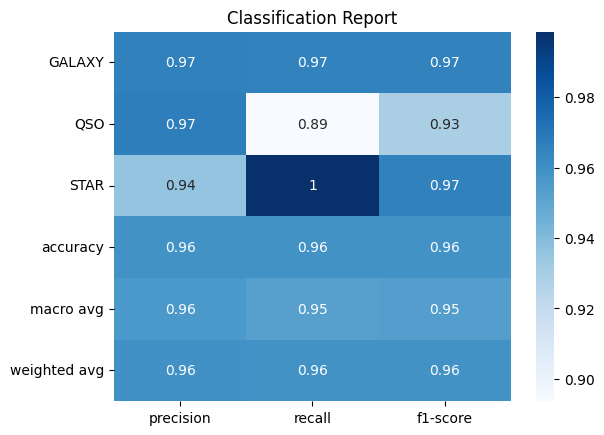

Accuracy: 95.91%


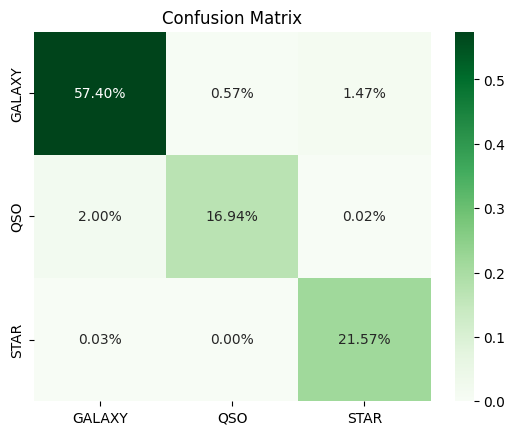

In [ ]:
#MAY TAKE 5-6 MINUTES TO RUN

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#our classification model
svc_model = SVC()

#generate cross-validated predictions for all k-folds.
y_pred = cross_val_predict(svc_model, X=X, y=y, cv=kfold)

#output
svm_report = classification_report(y, y_pred,
                                            output_dict = True)
sns.heatmap(pd.DataFrame(svm_report).iloc[:-1, :].T,
            cmap = "Blues", annot=True)
plt.title("Classification Report")
plt.show()

print(f'Accuracy: {svm_report["accuracy"] * 100:.2f}%')

svm_matrix = confusion_matrix(y, y_pred)
sns.heatmap(svm_matrix/np.sum(svm_matrix),
            cmap = "Greens", fmt = ".2%", xticklabels = labels,
            yticklabels = labels, annot = True)
plt.title("Confusion Matrix")
plt.show()

The Support Vector Machines algorithm from the sci-kit library was employed, and an impressive 95.91% accuracy was achieved in classifying database entries. This outcome underscores the efficacy of this robust model. The precision, recall, and f1 score values further attest to the excellence of our results.

All in all, the most accurate model for classifying our dataset turned out to be Random Forest, with KNN's and SVM following closely. Naive Bayes's performance is still an acceptable 78%, and perhaps this simple method can be excused if the imbalanced nature of the dataset is taken into account.





